# Библиотеки и данные

In [52]:
import pandas as pds
from google.colab import files 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
from scipy import stats

Финальный датасет из примера (загружаем)

In [3]:
uploaded = files.upload()

Saving cars_moldova_clean.csv to cars_moldova_clean.csv


In [6]:
db = pds.read_csv('/content/cars_moldova_clean.csv', delimiter = ',')
db

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636
...,...,...,...,...,...,...,...,...,...,...,...
35512,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,11250.000000
35513,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714
35514,Mercedes,E Class,2016,Sedan,50000.0,1950.0,Diesel,Automatic,29500.0,6,8333.333333
35515,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,16,23125.000000


In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35517 entries, 0 to 35516
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  35517 non-null  object 
 1   Model                 35517 non-null  object 
 2   Year                  35517 non-null  int64  
 3   Style                 35517 non-null  object 
 4   Distance              35517 non-null  float64
 5   Engine_capacity(cm3)  35517 non-null  float64
 6   Fuel_type             35517 non-null  object 
 7   Transmission          35517 non-null  object 
 8   Price(euro)           35517 non-null  float64
 9   Age                   35517 non-null  int64  
 10  km_year               35517 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 3.0+ MB


# Визуализация

Гистограмма с наиболее высокой дистанцией в зависимости от кузова

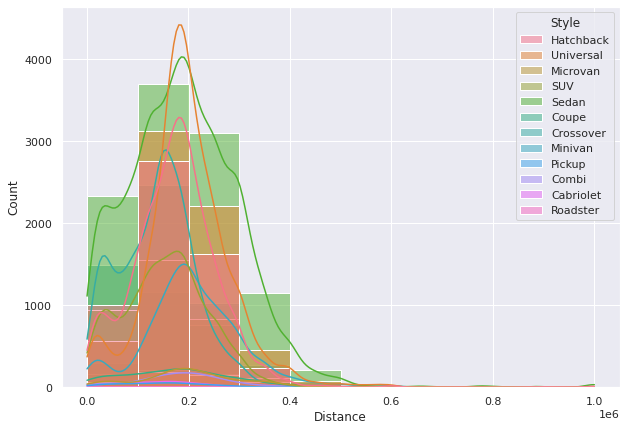

In [24]:
plt.figure(figsize=(10,7))
sns.histplot(    
    data=db,
    x="Distance",
    hue="Style",
    bins=10,
    kde=True  
    );

Скаттерограмма с зависимостью цены от возраста, а ещё с пробегом и типом кузова

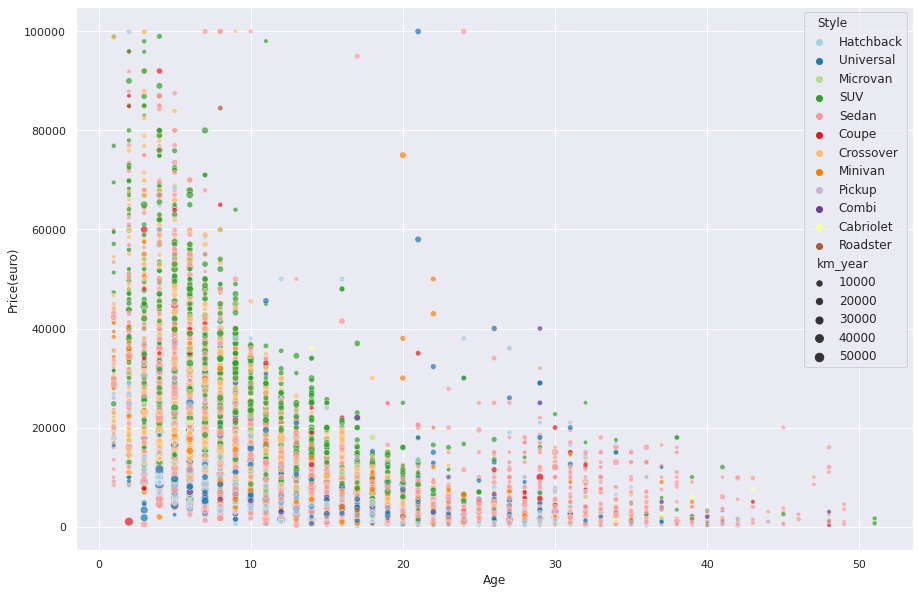

In [32]:
plt.figure(figsize=(15,10))
sns.scatterplot(    
    data=db,
    x="Age", y="Price(euro)",
    hue="Style", 
    size = "km_year", alpha = 0.7,
             palette='Paired'
    );

Скаттерограмма зависимости цены от объёма двигателя с разделением по кузову

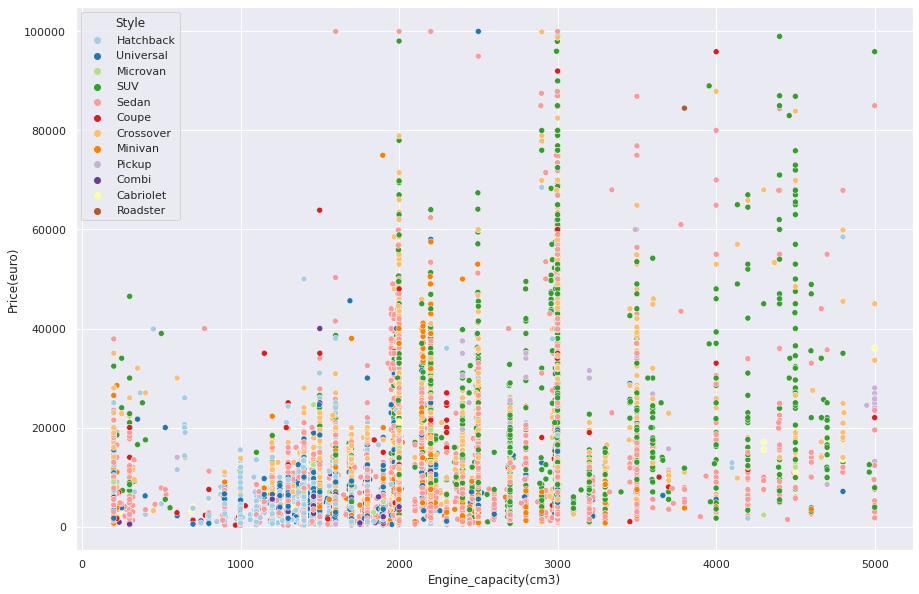

In [38]:
plt.figure(figsize=(15,10))
sns.scatterplot(    
    data=db,
    x="Engine_capacity(cm3)", y="Price(euro)",
    hue="Style", palette='Paired'
    );

# Дополнительные признаков

**Квантильные категории для столбца "удельный пробег за год"**

Введена новая колонка "Class_distance" куда записывается значение big если пробег за год больше 30000, small если он меньше 15000 и medium если он между 15000 и 30000

In [41]:
conditions = [(db['km_year'] <= 15000), (db['km_year'] >= 30000)]
values = ['small', 'big']
db['Class_distance'] = np.select(conditions, values, default='medium')
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35517 entries, 0 to 35516
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  35517 non-null  object 
 1   Model                 35517 non-null  object 
 2   Year                  35517 non-null  int64  
 3   Style                 35517 non-null  object 
 4   Distance              35517 non-null  float64
 5   Engine_capacity(cm3)  35517 non-null  float64
 6   Fuel_type             35517 non-null  object 
 7   Transmission          35517 non-null  object 
 8   Price(euro)           35517 non-null  float64
 9   Age                   35517 non-null  int64  
 10  km_year               35517 non-null  float64
 11  mileage               35517 non-null  object 
 12  Class_distance        35517 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 3.5+ MB


При категории Rare и маленькой стоимости (меньше 2500), заменяем производителя на Rare_cheap. При большой стоимости (больше 35000) - на Rare_expencive

In [43]:
db['Make'] = np.where((db['Price(euro)'] < 2500) & (db['Make'] == 'Rare'), 'Rare_cheap', db['Make'])
db['Make'] = np.where((db['Price(euro)'] < 35000) & (db['Make'] == 'Rare'), 'Rare_expencive', db['Make'])

In [44]:
counts = db.Make.value_counts()

counts

Volkswagen        3730
Toyota            3410
Mercedes          3287
BMW               2797
Renault           2616
Opel              1956
Skoda             1902
Audi              1649
Ford              1493
Dacia             1458
Nissan            1449
Hyundai           1444
Honda              965
KIA                735
Mitsubishi         670
Lexus              658
Volvo              630
Vaz                493
Mazda              477
Chevrolet          432
Peugeot            414
Citroen            324
Land Rover         305
Seat               258
Suzuki             257
Porsche            222
Fiat               194
Subaru             154
Rare_expencive     134
Rare_cheap         125
Rover               98
Chrysler            93
Jeep                83
Infiniti            78
Mini                76
Jaguar              75
Daewoo              66
Lincoln             54
Dodge               51
Alfa Romeo          38
GAZ                 34
Ssangyong           34
Smart               33
Moskvich / 

# Предварительная обработка данных

Делим данные на категориальные и числовые

In [45]:
cat_columns = []
num_columns = []

for column_name in db.columns:
    if (db[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

Нормализуем

In [46]:
DB_norm  = db.copy()
Xmin = db[num_columns].min()
Xmax = db[num_columns].max()

DB_norm[num_columns] = (db[num_columns]- Xmin)/( Xmax - Xmin)

Стандартизируем

In [47]:
DB_scaled = db.copy()
M = db[num_columns].mean()
STD = db[num_columns].std()
DB_scaled[num_columns] = (db[num_columns]-M)/STD

Производим степенное преобразование (Box-Cox)

In [48]:
stats.boxcox(db['Distance'])
stats.boxcox(db['Year'])
stats.boxcox(db['Engine_capacity(cm3)'])
stats.boxcox(db['Price(euro)'])
stats.boxcox(db['Age'])
stats.boxcox(db['km_year'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


(array([1595.82854755, 1540.12542208, 1131.14059545, ...,  925.82727389,
        1932.9549679 , 1661.69420266]), 0.7204592082840217)

Ordinal / One-Hot Encoding

In [53]:
pds.get_dummies(db[cat_columns])

,Make_Alfa Romeo,Make_Audi,Make_BMW,Make_Chevrolet,Make_Chrysler,Make_Citroen,Make_Dacia,Make_Daewoo,Make_Daihatsu,Make_Dodge,...,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Transmission_Automatic,Transmission_Manual,mileage_big,mileage_medium,mileage_small,Class_distance_big,Class_distance_medium,Class_distance_small
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
35513,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
35514,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
35515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


# Сохранение данных

Сохраняем новую db с обновленными и добавленными данными

In [ ]:
db.to_csv('/content/cars_moldova_norm.csv',index=False)